**그리드 서치(GridSearchCV)**는 머신러닝 모델의 성능을 최적화하기 위해 가장 좋은 하이퍼파라미터 조합을 찾아주는 도구입니다.


모델의 성능은 하이퍼파라미터(Hyperparameter) 값에 따라 크게 달라지는데, 

GridSearchCV는 사용자가 지정한 여러 후보 값들을 '격자(Grid)'처럼 하나씩 모두 조합하여 테스트합니다.


예를 들어, KNN 모델에서 n_neighbors 값이 [3, 5, 7]이고, weights 값이 ['uniform', 'distance']일 경우, 아래와 같이 모든 조합을 시도합니다.

- n_neighbors=3, weights='uniform'

- n_neighbors=3, weights='distance'

- n_neighbors=5, weights='uniform'

...

GridSearchCV는 이 모든 조합을 **교차 검증(Cross-Validation)**을 통해 검증하고, 

가장 높은 점수를 얻은 조합을 최종 '최적의 하이퍼파라미터'로 선정합니다. 

덕분에 수동으로 여러 값을 테스트하며 최적의 조합을 찾을 필요가 없어집니다.


최적의 하이퍼파라미터: {'n_neighbors': 1}
최고 교차 검증 점수: 0.9861

최적 모델의 테스트 정확도: 0.9778


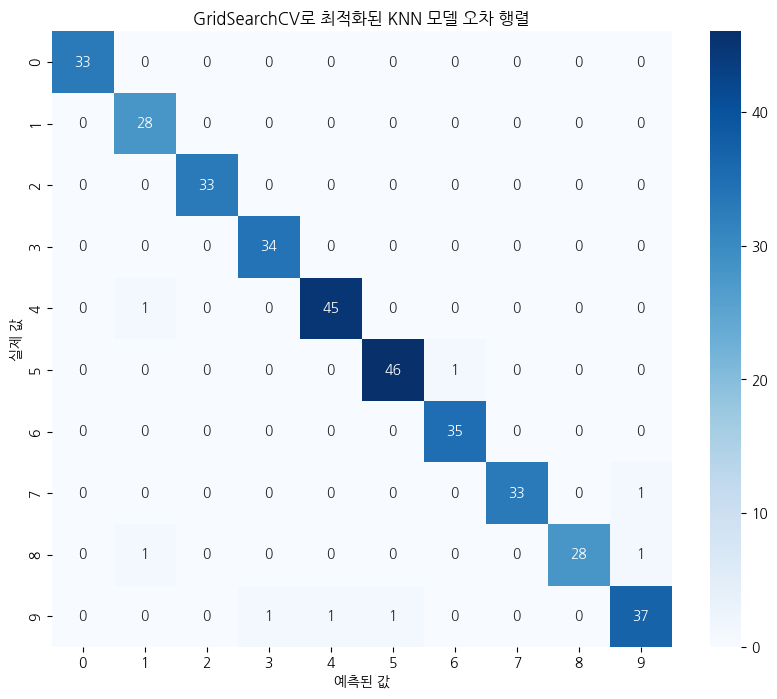

In [2]:
# 파일명: 21_GridSearchCV를_활용한_모델_최적화.ipynb

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# -----------------------------------------------------------
# 1. 환경 설정 및 라이브러리 설치 안내
# -----------------------------------------------------------
# 이 코드를 실행하기 위해 필요한 패키지를 설치하는 방법입니다.
# 사용하시는 가상 환경 이름은 'mldl_env_250804'를 자동으로 사용합니다.
# 터미널에서 다음 명령어를 실행하여 필요한 라이브러리를 설치하세요.
# python3 -m pip install scikit-learn matplotlib numpy seaborn

# -----------------------------------------------------------
# 2. 한글 폰트 설정
# -----------------------------------------------------------
# matplotlib에서 한글을 정상적으로 표시하기 위해 폰트를 설정합니다.
# 'NanumGothic' 폰트가 설치되어 있지 않으면 경고가 발생할 수 있습니다.
# 폰트가 없는 경우, 'NanumGothic'을 설치하거나 다른 한글 폰트 이름을 사용하세요.
try:
    font_path = fm.findfont(fm.FontProperties(family='NanumGothic'))
    plt.rcParams['font.family'] = 'NanumGothic'
    plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지
except:
    print("경고: NanumGothic 폰트를 찾을 수 없습니다. 한글을 올바르게 표시하려면 한글 폰트를 설치하세요.")

# -----------------------------------------------------------
# 3. 데이터 준비
# -----------------------------------------------------------
# sklearn에서 제공하는 손글씨 숫자(digits) 데이터셋을 로드합니다.
digits = load_digits()

# 특성(X)과 타겟(y) 데이터를 분리합니다.
X = digits.data
y = digits.target

# -----------------------------------------------------------
# 4. 훈련 세트와 테스트 세트 분리
# -----------------------------------------------------------
# 데이터를 훈련 세트와 테스트 세트로 나눕니다. (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------------------------------------
# 5. GridSearchCV를 사용하여 최적의 하이퍼파라미터 찾기
# -----------------------------------------------------------
# KNN 모델을 정의합니다.
knn = KNeighborsClassifier()

# 탐색할 하이퍼파라미터의 범위를 정의합니다.
# n_neighbors의 값이 1부터 10까지 변화할 때 어떤 값이 가장 좋은지 찾습니다.
param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

# GridSearchCV 객체를 생성합니다.
# estimator: 모델 객체 (여기서는 KNN)
# param_grid: 탐색할 하이퍼파라미터
# cv: 교차 검증(cross-validation)을 몇 번 수행할지 설정합니다. (5-겹 교차 검증)
# n_jobs: 사용할 CPU 코어 수. -1로 설정하면 모든 코어를 사용합니다.
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1)

# 훈련 데이터를 사용하여 그리드 서치를 실행합니다.
grid_search.fit(X_train, y_train)

# -----------------------------------------------------------
# 6. 최적의 하이퍼파라미터와 모델 성능 확인
# -----------------------------------------------------------
# GridSearchCV가 찾은 최적의 하이퍼파라미터(best_params_)를 출력합니다.
print(f"\n최적의 하이퍼파라미터: {grid_search.best_params_}")
# 결과 설명: 'n_neighbors' 값 중 교차 검증 점수가 가장 높게 나온 최적의 값을 보여줍니다.

# 최적의 하이퍼파라미터로 훈련된 모델의 최고 점수(best_score_)를 출력합니다.
print(f"최고 교차 검증 점수: {grid_search.best_score_:.4f}")
# 결과 설명: 위에서 찾은 최적의 하이퍼파라미터로 모델을 훈련했을 때의 교차 검증 평균 점수입니다.

# 최적의 모델(best_estimator_)을 가져옵니다.
best_model = grid_search.best_estimator_

# -----------------------------------------------------------
# 7. 최적의 모델로 테스트 데이터 평가
# -----------------------------------------------------------
# 최적의 모델을 사용하여 테스트 세트로 예측을 수행합니다.
y_pred = best_model.predict(X_test)

# 최종 정확도(Accuracy)를 계산합니다.
accuracy = accuracy_score(y_test, y_pred)
print(f"\n최적 모델의 테스트 정확도: {accuracy:.4f}")
# 결과 설명: 최적화된 모델이 한 번도 보지 못한 테스트 데이터를 얼마나 잘 예측했는지에 대한 최종 정확도입니다.

# -----------------------------------------------------------
# 8. 오차 행렬 시각화
# -----------------------------------------------------------
# 오차 행렬을 히트맵(heatmap)으로 시각화하여 결과를 쉽게 파악할 수 있습니다.
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel("예측된 값")
plt.ylabel("실제 값")
plt.title("GridSearchCV로 최적화된 KNN 모델 오차 행렬")
plt.show()
# 결과 설명: 히트맵은 예측된 값과 실제 값을 비교한 표입니다.
# 대각선에 위치한 값이 높을수록(색이 진할수록) 모델이 정확하게 예측했음을 의미합니다.
# 대각선이 아닌 다른 칸에 값이 있다면, 해당 클래스를 잘못 분류했다는 뜻입니다.
